In [1]:
!pip install python-dotenv
!pip install seaborn

In [2]:
import os
import requests
from dotenv import load_dotenv
import pandas as pd
import numpy as np

In [3]:
load_dotenv()
api_key = os.getenv("RIOT_API_KEY")

if api_key:
    print("API 키를 성공적으로 불러왔습니다.")
else:
    print("API 키를 불러오지 못했습니다. .env 파일을 확인해주세요.")

API 키를 성공적으로 불러왔습니다.


In [4]:
game_name = "롤만있는세상"
tag_line = "KR1"

print(f"조회 대상: {game_name}#{tag_line}")

조회 대상: 롤만있는세상#KR1


In [ ]:
url = f"https://asia.api.riotgames.com/riot/account/v1/accounts/by-riot-id/{game_name}/{tag_line}"

headers = {"X-Riot-Token": api_key}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    account_data = response.json()
    puuid = account_data['puuid']
    
    print(f"소환사 이름: {account_data['gameName']}#{account_data['tagLine']}")
    print(f"PUUID: {puuid}")
else:
    print("오류 내용:", response.json())

소환사 이름: 롤만있는세상#KR1
PUUID: 1ImKeioXGIkMmEITLThc3ACKdSFeVcsuVxd9n61L-DH8_-FagsTdbLozaLRzrNa_GWpV1QY6ITKUvQ


In [ ]:
url_for_matchlist = f"https://asia.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?count=20"

response_matchlist = requests.get(url_for_matchlist, headers=headers)

if response_matchlist.status_code == 200:
    match_list = response_matchlist.json()

    print(f"API로부터 실제로 받아온 경기 수: {len(match_list)}")
    
    print("\n최근 경기 목록")
    print(match_list)
    
    if len(match_list) > 0:
        target_match_id = match_list[0]
        print(f"\n첫 번째 경기 ID: {target_match_id}")
    else:
        print("최근 경기 기록이 없습니다.")
        target_match_id = None
else:
    print(f"오류: {response_matchlist.status_code}")
    print(response_matchlist.json())
    match_list = None
    target_match_id = None

API로부터 실제로 받아온 경기 수: 20

최근 경기 목록
['KR_7835795875', 'KR_7835720654', 'KR_7835659006', 'KR_7835564975', 'KR_7835487047', 'KR_7835418603', 'KR_7829879741', 'KR_7829809473', 'KR_7829730116', 'KR_7829666468', 'KR_7819990656', 'KR_7819960621', 'KR_7819899783', 'KR_7819857838', 'KR_7819819678', 'KR_7819775826', 'KR_7816744837', 'KR_7816696254', 'KR_7816641975', 'KR_7816590953']

첫 번째 경기 ID: KR_7835795875


In [10]:
url_for_matchdata = f"https://asia.api.riotgames.com/lol/match/v5/matches/{target_match_id}"

if target_match_id:
    response_matchdata = requests.get(url_for_matchdata, headers=headers)

    if response_matchdata.status_code == 200:
        match_data = response_matchdata.json()
        print("\n해당 경기의 상세 데이터")
        
        my_game_data = None
        for participant in match_data['info']['participants']:
            if participant['puuid'] == puuid:
                my_game_data = participant
                break
        
        if my_game_data:
            print("\n--- 나의 게임 성적 ---")
            print(f"승리: {my_game_data['win']}")
            print(f"챔피언: {my_game_data['championName']}")
            print(f"KDA: {my_game_data['kills']}/{my_game_data['deaths']}/{my_game_data['assists']}")
            print(f"가한 피해량: {my_game_data['totalDamageDealtToChampions']}")
            print(f"입은 피해량: {my_game_data['totalDamageTaken']}")
            print(f"막은 피해량: {my_game_data['damageSelfMitigated']}")
            print("-------------------")
        
    else:
        print(f"오류: {response_matchdata.status_code}")
        print(response_matchdata.json())
        match_data = None
else:
    print("\n분석할 경기 ID가 없습니다. 이전 셀을 먼저 실행해주세요.")


해당 경기의 상세 데이터

--- 나의 게임 성적 ---
승리: True
챔피언: Soraka
KDA: 1/4/53
가한 피해량: 6226
입은 피해량: 16545
막은 피해량: 7369
-------------------


In [11]:
if 'match_data' in locals() and match_data:
    print("--- match_data의 최상위 키 ---")
    print(list(match_data.keys()))
    
    print("\n--- match_data['info']의 주요 키 ---")
    if 'info' in match_data:
        print(list(match_data['info'].keys()))

    print("\n--- 1번째 소환사의 데이터 일부 ---")
    if 'info' in match_data and 'participants' in match_data['info'] and len(match_data['info']['participants']) > 0:
        first_participant = match_data['info']['participants'][0]
        print(list(first_participant.keys()))
    else:
        print("소환사 정보가 없습니다.")
else:
    print("먼저 'match_data'를 가져와야 합니다.")

--- match_data의 최상위 키 ---
['metadata', 'info']

--- match_data['info']의 주요 키 ---
['endOfGameResult', 'gameCreation', 'gameDuration', 'gameEndTimestamp', 'gameId', 'gameMode', 'gameModeMutators', 'gameName', 'gameStartTimestamp', 'gameType', 'gameVersion', 'mapId', 'participants', 'platformId', 'queueId', 'teams', 'tournamentCode']

--- 1번째 소환사의 데이터 일부 ---
['PlayerScore0', 'PlayerScore1', 'PlayerScore10', 'PlayerScore11', 'PlayerScore2', 'PlayerScore3', 'PlayerScore4', 'PlayerScore5', 'PlayerScore6', 'PlayerScore7', 'PlayerScore8', 'PlayerScore9', 'allInPings', 'assistMePings', 'assists', 'baronKills', 'basicPings', 'challenges', 'champExperience', 'champLevel', 'championId', 'championName', 'championTransform', 'commandPings', 'consumablesPurchased', 'damageDealtToBuildings', 'damageDealtToObjectives', 'damageDealtToTurrets', 'damageSelfMitigated', 'dangerPings', 'deaths', 'detectorWardsPlaced', 'doubleKills', 'dragonKills', 'eligibleForProgression', 'enemyMissingPings', 'enemyVisionPi

In [12]:
if 'match_data' in locals() and match_data:

    participants_data = match_data['info']['participants']
    df_participants = pd.DataFrame(participants_data)

    df_participants['Riot ID'] = df_participants['riotIdGameName'] + '#' + df_participants['riotIdTagline']

    df_participants['KDA'] = (
        df_participants['kills'].astype(str) + '/' +
        df_participants['deaths'].astype(str) + '/' +
        df_participants['assists'].astype(str)
    )

    df_participants['챔피언'] = df_participants['championName']
    df_participants['골드 획득량'] = df_participants['goldEarned']
    df_participants['가한 피해량'] = df_participants['totalDamageDealtToChampions']
    df_participants['입은 피해량'] = df_participants['totalDamageTaken']

    display_columns = [
        'Riot ID', '챔피언', 'win', 'KDA', 
        '골드 획득량', '가한 피해량', '입은 피해량'
    ]
    
    existing_columns = [col for col in display_columns if col in df_participants.columns]
    
    print("\n--- 최근 게임 데이터 ---")
    pd.set_option('display.max_columns', None)
    display(df_participants[existing_columns])

else:
    print("먼저 경기 상세 데이터(match_data)를 가져와야 합니다.")


--- 최근 게임 데이터 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
0,rckory#KR1,Karthus,True,8/11/39,11144,34613,22944
1,유후람람라#9840,KogMaw,True,18/8/26,13561,35596,24127
2,The Hojat#KR1,Kassadin,True,22/7/25,13207,33745,27372
3,랑 뚱#KR1,Jayce,True,9/4/39,11671,31624,13238
4,롤만있는세상#KR1,Soraka,True,1/4/53,9987,6226,16545
5,이브브#2222,Rammus,False,2/13/24,9517,15933,42694
6,안성싱싱야채#KR1,Taliyah,False,9/14/15,11500,23715,24257
7,OrdinaryShot#KR1,Vayne,False,8/10/10,10685,18166,30827
8,삼브브#KR1,Zyra,False,4/11/16,9971,21819,19687
9,아구파발발타#KR3,Irelia,False,11/10/11,12888,20563,38674


In [13]:
response_matchlist = requests.get(url_for_matchlist, headers=headers)

if response_matchlist.status_code == 200:
    match_list = response_matchlist.json()
    
    if len(match_list) > 0:
        for i in range(len(match_list)):
            target_id = match_list[i]
            print(f"\n{i+1}번째 경기 ID: {target_id}")
    else:
        print("최근 경기 기록이 없습니다.")
        target_id = None
else:
    print(f"오류: {response_matchlist.status_code}")
    print(response_matchlist.json())
    match_list = None
    target_id = None


1번째 경기 ID: KR_7835795875

2번째 경기 ID: KR_7835720654

3번째 경기 ID: KR_7835659006

4번째 경기 ID: KR_7835564975

5번째 경기 ID: KR_7835487047

6번째 경기 ID: KR_7835418603

7번째 경기 ID: KR_7829879741

8번째 경기 ID: KR_7829809473

9번째 경기 ID: KR_7829730116

10번째 경기 ID: KR_7829666468

11번째 경기 ID: KR_7819990656

12번째 경기 ID: KR_7819960621

13번째 경기 ID: KR_7819899783

14번째 경기 ID: KR_7819857838

15번째 경기 ID: KR_7819819678

16번째 경기 ID: KR_7819775826

17번째 경기 ID: KR_7816744837

18번째 경기 ID: KR_7816696254

19번째 경기 ID: KR_7816641975

20번째 경기 ID: KR_7816590953


In [15]:
response_matchlist = requests.get(url_for_matchlist, headers=headers)

if response_matchlist.status_code == 200:
    match_list = response_matchlist.json()

    if len(match_list) > 0:
        for i in range(len(match_list)):
            target_id = match_list[i]
            if target_id:
                url_for_matchdata = f"https://asia.api.riotgames.com/lol/match/v5/matches/{target_id}"
                
                response_matchdata = requests.get(url_for_matchdata, headers=headers)

                if response_matchdata.status_code == 200:
                    all_match_data = response_matchdata.json()
                    print(f"\n {i+1}번째 경기의 상세 데이터")
                    my_game_data = None

                    for participant in all_match_data['info']['participants']:
                        if participant['puuid'] == puuid:
                            my_game_data = participant
                            break
        
                    if my_game_data:
                        print("\n--- 나의 게임 성적 ---")
                        print(f"승리: {my_game_data['win']}")
                        print(f"챔피언: {my_game_data['championName']}")
                        print(f"KDA: {my_game_data['kills']}/{my_game_data['deaths']}/{my_game_data['assists']}")
                        print(f"가한 피해량: {my_game_data['totalDamageDealtToChampions']}")
                        print(f"입은 피해량: {my_game_data['totalDamageTaken']}")
                        print(f"막은 피해량: {my_game_data['damageSelfMitigated']}")
                        print("-------------------")
        
                else:
                    print(f"오류: {response_matchdata.status_code}")
                    print(response_matchdata.json())
                    match_data = None
            else:
                print("\n분석할 경기가 없습니다. 이전 셀을 먼저 실행해주세요.")
    else:
        print("최근 경기 기록이 없습니다.")
        target_match_id = None
else:
    print(f"오류: {response_matchlist.status_code}")
    print(response_matchlist.json())
    match_list = None
    target_match_id = None


 1번째 경기의 상세 데이터

--- 나의 게임 성적 ---
승리: True
챔피언: Soraka
KDA: 1/4/53
가한 피해량: 6226
입은 피해량: 16545
막은 피해량: 7369
-------------------

 2번째 경기의 상세 데이터

--- 나의 게임 성적 ---
승리: False
챔피언: Orianna
KDA: 10/7/26
가한 피해량: 19449
입은 피해량: 16054
막은 피해량: 8547
-------------------

 3번째 경기의 상세 데이터

--- 나의 게임 성적 ---
승리: True
챔피언: Zoe
KDA: 13/3/34
가한 피해량: 32054
입은 피해량: 10843
막은 피해량: 6756
-------------------

 4번째 경기의 상세 데이터

--- 나의 게임 성적 ---
승리: False
챔피언: Kaisa
KDA: 9/8/34
가한 피해량: 36572
입은 피해량: 21390
막은 피해량: 13503
-------------------

 5번째 경기의 상세 데이터

--- 나의 게임 성적 ---
승리: False
챔피언: Mel
KDA: 19/11/26
가한 피해량: 44277
입은 피해량: 29356
막은 피해량: 13042
-------------------

 6번째 경기의 상세 데이터

--- 나의 게임 성적 ---
승리: False
챔피언: Ahri
KDA: 7/11/19
가한 피해량: 25832
입은 피해량: 23521
막은 피해량: 8494
-------------------

 7번째 경기의 상세 데이터

--- 나의 게임 성적 ---
승리: True
챔피언: Mel
KDA: 10/5/20
가한 피해량: 26183
입은 피해량: 13515
막은 피해량: 6778
-------------------

 8번째 경기의 상세 데이터

--- 나의 게임 성적 ---
승리: True
챔피언: Sivir
KDA: 7/12/43
가한 피해량: 23946
입은 피해량: 31096
막

In [18]:

all_match_data = []

for match_id in match_list:
    url_for_matchdata = f"https://asia.api.riotgames.com/lol/match/v5/matches/{match_id}"

    response = requests.get(url_for_matchdata, headers=headers)

    if response.status_code == 200:
        all_match_data.append(response.json())
    else:
        print(f"경기 ID [{match_id}] 데이터 수집 실패 (오류 코드: {response.status_code})")

if 'all_match_data' in locals() and all_match_data:

    all_games_df = []

    for one_data in all_match_data:
        participant_one_data = one_data['info']['participants']
        df_one = pd.DataFrame(participant_one_data)

        df_one['matchId'] = one_data['metadata']['matchId']

        all_games_df.append(df_one)

    all_df = pd.concat(all_games_df, ignore_index=True)

    all_df['Riot ID'] = all_df['riotIdGameName'] + '#' + all_df['riotIdTagline']

    all_df['KDA'] = (
        all_df['kills'].astype(str) + '/' +
        all_df['deaths'].astype(str) + '/' +
        all_df['assists'].astype(str)
    )

    all_df.rename(columns={'championName': '챔피언',
                           'goldEarned': '골드 획득량',
                           'totalDamageDealtToChampions': '가한 피해량',
                           'totalDamageTaken': '입은 피해량'}, inplace=True)

    display_columns = [
        'Riot ID', '챔피언', 'win', 'KDA', 
        '골드 획득량', '가한 피해량', '입은 피해량'
    ]
    
    existing_columns = [col for col in display_columns if col in all_df.columns]
    unique_match = all_df['matchId'].unique()

    pd.set_option('display.max_columns', None)

    for match_id in unique_match:
        print(f"\n--- {match_id} ---")
        one_game = all_df[all_df['matchId'] == match_id]
        display(one_game[existing_columns])

else:
    print("먼저 경기 상세 데이터(match_data)를 가져와야 합니다.")


--- KR_7835795875 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
0,rckory#KR1,Karthus,True,8/11/39,11144,34613,22944
1,유후람람라#9840,KogMaw,True,18/8/26,13561,35596,24127
2,The Hojat#KR1,Kassadin,True,22/7/25,13207,33745,27372
3,랑 뚱#KR1,Jayce,True,9/4/39,11671,31624,13238
4,롤만있는세상#KR1,Soraka,True,1/4/53,9987,6226,16545
5,이브브#2222,Rammus,False,2/13/24,9517,15933,42694
6,안성싱싱야채#KR1,Taliyah,False,9/14/15,11500,23715,24257
7,OrdinaryShot#KR1,Vayne,False,8/10/10,10685,18166,30827
8,삼브브#KR1,Zyra,False,4/11/16,9971,21819,19687
9,아구파발발타#KR3,Irelia,False,11/10/11,12888,20563,38674



--- KR_7835720654 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
10,소드마스텅#KR1,Sion,True,5/14/14,11272,22538,79511
11,박진협#jg02,Heimerdinger,True,9/6/12,12638,26260,13594
12,그 렉#KR1,Akshan,True,13/10/13,14154,27807,20947
13,타코야끼쨔응#KR1,Jinx,True,7/7/18,12513,28872,15326
14,너 그마#GM1,Brand,True,5/8/27,12426,34634,18326
15,MCC무현#KR1,Nidalee,False,11/6/22,12452,23849,23784
16,최진혁#8062,TahmKench,False,5/8/21,10268,23104,59953
17,힘내자 대한민국#KR1,Aphelios,False,12/10/18,12966,34757,24454
18,pdoolgi#KR1,Taliyah,False,7/8/26,12477,33773,20221
19,롤만있는세상#KR1,Orianna,False,10/7/26,12611,19449,16054



--- KR_7835659006 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
20,티칭프로#KR1,Gnar,False,11/9/20,12036,33728,26604
21,석 준 민#KR1,Leblanc,False,5/13/21,10231,23102,24233
22,족고수#4571,Ambessa,False,21/12/10,14059,36816,34842
23,김인직#KR5,Lulu,False,0/7/29,9188,8049,15507
24,니 시방 밥은 자셨냐#KR3,Illaoi,False,3/10/21,10139,17017,32793
25,중국인모두화형#KR1,MonkeyKing,True,14/10/25,12563,23871,35592
26,유경두#KR1,Varus,True,16/10/21,13729,26728,20143
27,grm1316#KR1,Katarina,True,2/8/36,11266,24613,33146
28,pdoolgi#KR1,Jax,True,6/9/17,11589,17729,28608
29,롤만있는세상#KR1,Zoe,True,13/3/34,13181,32054,10843



--- KR_7835564975 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
30,얼음동동미숫가루#KR1,Ahri,True,9/15/28,15031,47729,33696
31,할말은많지만#KR1,Yunara,True,13/14/29,17753,49206,31053
32,울먹이는 울머기#KR1,Fizz,True,12/15/27,14645,35488,85857
33,오빠cha2#KR1,DrMundo,True,7/13/19,12956,34896,86546
34,쿠크다스 멜랑쥬 #KR1,Shaco,True,18/9/16,16173,36816,24656
35,블랙펭귄#KR1,Malzahar,False,11/11/33,15589,32356,32492
36,pdoolgi#KR1,Chogath,False,15/9/27,15207,41111,79617
37,롤만있는세상#KR1,Kaisa,False,9/8/34,14246,36572,21390
38,102565622del#KR1,Xayah,False,15/14/36,16668,64351,37268
39,Mygun#100,Zeri,False,15/17/36,16099,63966,39851



--- KR_7835487047 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
40,이응러지#대황이응,Camille,True,7/14/39,14199,37203,45584
41,Holden McGroin#1024,Pyke,True,13/12/31,14281,21013,32731
42,Dunak#1234,Ahri,True,18/10/30,17754,43716,30950
43,허룽이#KR1,Kaisa,True,24/11/34,19217,70740,36227
44,하얀거리o#KR1,Aurora,True,13/9/34,15168,33034,26992
45,초보임미당 하핫#KR1,Rengar,False,11/20/17,14998,30212,64474
46,명탐정뿌링클#KR1,Jhin,False,9/15/24,14392,24257,31993
47,용산 대명 나충기#KR2,FiddleSticks,False,7/16/26,13736,28596,40598
48,pdoolgi#KR1,Gwen,False,9/14/27,14998,29736,54022
49,롤만있는세상#KR1,Mel,False,19/11/26,18084,44277,29356



--- KR_7835418603 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
50,보복운전르끌레르#전운보초,Alistar,True,6/11/42,11515,23681,58734
51,먼지앙꼬#KR1,Ivern,True,3/6/41,10708,10882,19642
52,2종보통베르스타펜#전운보초,Zoe,True,11/6/29,12108,35658,17284
53,할머니리어카부수는호날두#메시갓,Mel,True,15/5/22,12695,29703,13937
54,MC촬스#KR1,MasterYi,True,20/11/23,15780,53011,34894
55,pdoolgi#KR1,Malphite,False,10/12/13,12903,29787,24476
56,롤만있는세상#KR1,Ahri,False,7/11/19,10882,25832,23521
57,쌍 칼#1989,Trundle,False,5/10/22,10819,21805,55884
58,홍박사님#연락처좀,Blitzcrank,False,1/14/21,9768,12967,42114
59,IM BearGrylls#KR1,Jhin,False,16/8/15,13733,32990,17361



--- KR_7829879741 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
60,또자라#KR1,Malzahar,True,8/8/20,14302,33165,21967
61,한라산의정기#KR1,Vayne,True,7/10/14,13522,30343,21954
62,Celkey#KR1,Qiyana,True,13/15/16,13418,41212,28098
63,pdoolgi#KR1,Lillia,True,4/6/23,12280,27300,27093
64,롤만있는세상#KR1,Mel,True,10/5/20,14624,26183,13515
65,아빠깨물면에비앙#KR1,Camille,False,18/11/15,14339,25029,44778
66,돼지고기덮밥#부타동,Skarner,False,9/7/23,12942,18410,37186
67,모렐로#모렐로,Senna,False,8/7/29,13984,23636,21316
68,호나우두#ICON,Thresh,False,3/10/26,10991,10694,45413
69,KaDako#KR1,Zyra,False,5/7/20,12807,22900,18292



--- KR_7829809473 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
70,Yekaterin#KR1,Sett,False,17/14/27,16342,59076,49757
71,1958214del#KR1,Twitch,False,13/15/33,14803,55408,36545
72,쉔기방패#KR1,Olaf,False,8/12/26,14124,37633,40300
73,비둘기남#KR1,Urgot,False,15/12/29,15844,51699,42731
74,열심히해볼게#zzz,Varus,False,12/13/27,14461,45893,35398
75,아빠깨물면에비앙#KR1,Volibear,True,14/15/28,15170,44880,91259
76,봉오리산 호랑이#0315,TwistedFate,True,12/12/28,15222,33586,39668
77,pdoolgi#KR1,Fizz,True,10/12/39,14252,40528,69540
78,롤만있는세상#KR1,Sivir,True,7/12/43,15391,23946,31096
79,심원의 악#KR1,Jayce,True,22/14/27,17077,51693,35656



--- KR_7829730116 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
80,퇴사할 수 없는 직장이 있어요#3331,Kaisa,False,24/17/24,18517,52289,43412
81,pdoolgi#KR1,Lucian,False,15/15/31,17249,42587,39394
82,롤만있는세상#KR1,FiddleSticks,False,11/18/31,14486,27980,46086
83,사이먼#tedd,Velkoz,False,6/19/35,13697,33870,41883
84,니딸내딸#KR1,Akali,False,14/17/35,16456,47157,90168
85,재 은#KR2,Nautilus,True,2/14/41,13479,29134,59957
86,Musk Park#Musk,JarvanIV,True,18/16/52,18014,56347,50823
87,我妻善逸#517,Hwei,True,9/14/41,14358,25195,33688
88,Square#2003,Aurora,True,32/11/24,19184,78957,34449
89,oopp#5022,Yasuo,True,25/15/26,17883,59282,40283



--- KR_7829666468 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
90,Funne#KR1,Akali,False,8/10/10,10537,13525,19733
91,내가 하늘에 서겠다#0830,Mordekaiser,False,7/8/9,10226,15702,22223
92,제티랑 비타민#KR1,Syndra,False,5/10/8,9152,16658,15905
93,pdoolgi#KR1,Corki,False,6/7/12,10750,12359,14348
94,롤만있는세상#KR1,Brand,False,4/7/16,9751,18536,15168
95,박제가 되어버린 천재를 아시오#1220,Malphite,True,8/8/14,10029,19371,15759
96,Your Baby#KR1,Graves,True,16/8/16,12671,23357,15169
97,공중에뜸#7886,Shen,True,5/5/24,10071,15470,25321
98,노루빵디상륙작전#7777,Jhin,True,12/5/16,11746,12406,12472
99,으아으아어지럽다#KR1,Malzahar,True,1/4/28,10536,14315,13089



--- KR_7819990656 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
100,Blue#B0004,Xerath,False,10/6/23,16191,52042,19906
101,meteo10#kr20,Corki,False,19/8/12,19619,77562,29633
102,주 지 태#KR2,Janna,False,4/7/28,14902,14038,24735
103,신체검사#KR1,Lux,False,5/11/20,14606,37910,27055
104,써니쟈#내색시,Braum,False,2/10/22,13668,35908,63634
105,pdoolgi#KR1,Graves,True,16/10/14,19061,38613,34077
106,롤만있는세상#KR1,Zilean,True,6/8/22,16602,26735,25817
107,이거지면 나울어#KR1,Sion,True,1/7/22,13986,18045,77340
108,DEVELOP#CODE,Gangplank,True,14/9/11,17789,47442,38624
109,베르나르웰버#KR1,Gragas,True,5/6/22,14779,24836,60854



--- KR_7819960621 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
110,SSSo222#KR1,Ezreal,True,8/4/9,9497,14971,10462
111,사당동피바라기#KR1,Twitch,True,5/2/11,9248,11478,8745
112,pdoolgi#KR1,Briar,True,8/4/11,9050,11619,26088
113,롤만있는세상#KR1,Seraphine,True,2/2/24,8377,14299,6808
114,이거지면 나울어#KR1,Tryndamere,True,4/3/16,8214,7173,16628
115,아 린#KR618,Blitzcrank,False,2/5/6,7185,6642,14809
116,짝 건#매버릭,Gnar,False,1/7/6,7711,11857,15252
117,정밀응용과학부#KR1,Sivir,False,6/6/7,9612,20374,12248
118,짖궂죠#KR1,Nami,False,0/4/14,7296,6062,8760
119,련지에요#KR1,Lux,False,6/5/9,8866,16738,9791



--- KR_7819899783 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
120,전문 패드리퍼#KR1,Viktor,False,12/13/28,15081,54822,34212
121,pdoolgi#KR1,Vi,False,12/13/30,15462,38353,45896
122,롤만있는세상#KR1,Varus,False,15/9/28,15774,39404,22552
123,도구말대답금지#KR1,Lucian,False,9/14/24,14902,45756,29945
124,오메가분대트위치#KR1,Azir,False,8/13/26,15046,41682,35251
125,싹싹김치#0831,RekSai,True,7/10/37,14771,21986,63756
126,싹싹묵은지#0613,Thresh,True,11/14/30,14452,20134,75776
127,있이발#KR1,Malzahar,True,6/10/32,16001,27071,29840
128,SKbatteryAmerica#KR1,Brand,True,16/9/23,16656,43761,26019
129,샤바샤바구#KR1,Jax,True,20/13/22,17130,43044,50161



--- KR_7819857838 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
130,pdoolgi#KR1,Malphite,True,4/7/19,12235,17872,14934
131,롤만있는세상#KR1,Yuumi,True,3/6/31,11039,17613,10697
132,윤무부두마리치킨#KR1,Hecarim,True,8/8/20,12489,24027,34426
133,준꾸리#1225,Sylas,True,7/6/23,12115,20478,29847
134,도구말대답금지#KR1,Corki,True,17/7/10,14852,27151,17008
135,초가스로셰계정복#KR1,Khazix,False,10/8/13,12428,22395,17249
136,긍정멘탈소유#KR1,Ahri,False,6/7/19,11084,14778,23876
137,희두나#5279,Nocturne,False,8/9/15,11580,14915,26880
138,호르꾸막또#KR1,Anivia,False,3/6/21,11404,12863,25804
139,Rice#KR122,Kayle,False,6/9/18,11388,16389,19452



--- KR_7819819678 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
140,pdoolgi#KR1,Veigar,True,9/5/13,12078,16238,17384
141,롤만있는세상#KR1,Yuumi,True,4/3/28,10980,15815,7329
142,때리지 마세요#2097,Jhin,True,8/3/14,13247,14914,10576
143,곤 약#곤약이,Bard,True,13/6/16,13512,23476,22497
144,우치하 유지민#3769,Galio,True,5/6/18,11832,11713,42654
145,재형랑#KR1,Camille,False,3/4/9,10383,14112,13456
146,영대랑#KR1,Aurora,False,8/7/11,11529,17013,17212
147,WVWVWWWVVVVVWVWV#WHORU,Elise,False,3/13/14,10568,12663,23830
148,귀여운 공격성#0807,Lucian,False,6/9/7,11018,18728,18820
149,IIIlIIlIlIllIIlI#lIIll,Zyra,False,3/6/16,10821,22174,13494



--- KR_7819775826 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
150,pdoolgi#KR1,Vladimir,False,6/14/18,12244,16702,41119
151,롤만있는세상#KR1,Karma,False,3/8/24,11257,9092,16341
152,귀찮게하지마#1001,Aphelios,False,22/9/5,16877,22565,24476
153,때리지 마세요#2097,Xayah,False,8/10/16,13227,17175,25460
154,魔法使いの夜#蒼崎 青子,Hwei,False,5/12/24,11734,23533,25114
155,국자즈#KR2,Yone,True,10/9/14,14282,22989,23896
156,우리모두버스타요#KR1,Lucian,True,12/14/16,14851,23988,25227
157,미간에선고#KR1,Orianna,True,17/9/25,15073,33421,18479
158,춘 천#KR5,Varus,True,9/5/17,13433,22986,13505
159,당길줄몰라요#KR1,Zyra,True,5/7/27,13083,26893,18361



--- KR_7816744837 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
160,널 먹는다#KR1,Kaisa,False,13/7/23,20432,51963,24813
161,쉐끼랍#KR1,Smolder,False,5/17/16,18791,35382,39209
162,나이스백업#KR1,Caitlyn,False,11/18/12,18850,37820,43583
163,Gomgukee#KR1,Karma,False,17/12/18,20362,57309,35227
164,재령이시#3508,Vayne,False,7/17/14,19440,51094,43067
165,스노우라쿤#KR1,Jinx,True,9/12/26,19068,33081,36889
166,롤만있는세상#KR1,Mel,True,31/8/21,24759,47043,28931
167,다음개소리#KR1,Braum,True,1/9/57,18577,25020,106751
168,바다코끼리#1234,Azir,True,9/13/29,19361,30203,43164
169,wjdenvkf#KR1,Syndra,True,21/11/27,20799,44409,30074



--- KR_7816696254 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
170,짱구야군대가자#KR1,Janna,True,0/7/41,13496,14231,23692
171,스노우라쿤#KR1,Zilean,True,5/6/31,14375,15677,20825
172,롤만있는세상#KR1,Nidalee,True,13/7/29,16146,32272,20640
173,다음개소리#KR1,Vex,True,9/7/22,14485,32406,20119
174,졸꾸러기#KR1,Jinx,True,20/11/17,18686,56159,37701
175,빛이스며들때까지#KR1,Gragas,False,10/7/18,15375,33395,28903
176,새 우#완 자,Milio,False,2/8/28,13066,9129,22965
177,1퍼남은배터리#KR1,Azir,False,5/9/22,14504,23486,23982
178,김해이동욱v#KR1,MasterYi,False,13/11/15,15684,26904,35741
179,지선예나수빈빛나#KR1,Renekton,False,8/12/19,14713,25637,52392



--- KR_7816641975 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
180,이시싯#KR1,Blitzcrank,False,8/11/22,12125,25764,56990
181,스노우라쿤#KR1,Syndra,False,13/11/33,14227,46167,25920
182,롤만있는세상#KR1,Milio,False,3/5/44,12283,10619,17738
183,다음개소리#KR1,Smolder,False,17/8/30,15368,61018,26613
184,극복의왕#0507,Karma,False,16/11/27,13984,38737,29036
185,KKZ 가오가이가#KKZ,Yunara,True,14/11/17,15195,22010,24069
186,RoZem#KR1,Ornn,True,6/9/23,13535,22647,48392
187,떡 락#3361,Sett,True,9/15/20,13385,37626,46213
188,BJ김봉준#KR1,Ashe,True,10/9/25,14875,41348,28282
189,몬키디루피다#KR1,Swain,True,7/13/22,13499,26451,63801



--- KR_7816590953 ---


,Riot ID,챔피언,win,KDA,골드 획득량,가한 피해량,입은 피해량
190,싸이코패스#KR111,Zilean,False,0/6/17,11675,11170,15962
191,귤락도락#4038,Annie,False,7/11/6,12902,16173,20800
192,NadiaLaArwall#KR1,Leona,False,3/10/7,11257,7283,29201
193,써머파뤼#KR1,Mordekaiser,False,6/10/9,12706,10427,35027
194,aamulan#2151,Azir,False,6/10/6,13194,16924,23518
195,스노우라쿤#KR1,Yunara,True,14/7/25,14881,33168,21036
196,롤만있는세상#KR1,Orianna,True,9/2/36,14094,23526,10024
197,다음개소리#KR1,Lulu,True,1/4/39,12280,6420,11329
198,샤 갈#KR1,Karma,True,7/5/35,13327,29548,16108
199,치과의사이전문#KR1,Lucian,True,16/4/16,15182,26245,12697


/var/folders/c3/w4n10zq52vzgts48kz_rsk2h0000gn/T/ipykernel_20575/3540376304.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=win_loss_counts.values, palette='coolwarm')


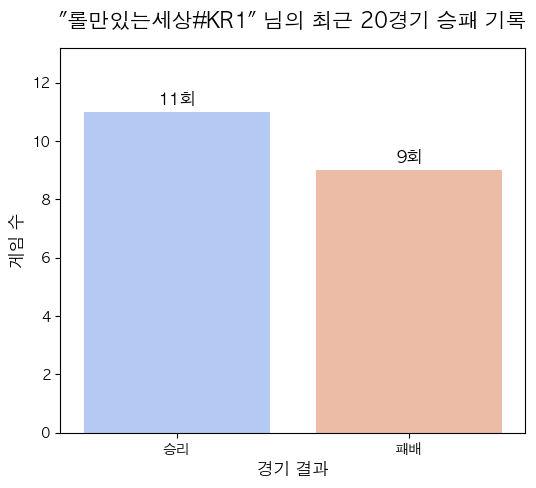

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


my_riot_id = "롤만있는세상#KR1"
my_games_df = all_df[all_df['Riot ID'] == my_riot_id].copy()

if not my_games_df.empty:
    win_loss_counts = my_games_df['win'].value_counts()

    plt.figure(figsize=(6, 5))
        
    labels = win_loss_counts.index.map({True: '승리', False: '패배'})
        
    ax = sns.barplot(x=labels, y=win_loss_counts.values, palette='coolwarm')

    plt.title(f'"{my_riot_id}" 님의 최근 {len(my_games_df)}경기 승패 기록', fontsize=15, pad=15)
    plt.xlabel('경기 결과', fontsize=12)
    plt.ylabel('게임 수', fontsize=12)
    plt.ylim(0, win_loss_counts.max() * 1.2)

    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}회',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9),
                    textcoords='offset points',
                    fontsize=12)
        
    plt.savefig('win_loss_ratio.png')
    plt.show()
        
else:
    print(f"'{my_riot_id}'에 해당하는 경기 기록을 찾을 수 없습니다.")

['.Aqua Kana', '.CJK Symbols Fallback HK', '.DecoType Nastaleeq Urdu UI', '.Keyboard', '.New York']
['.New York', '.SF Arabic', '.SF Arabic Rounded', '.SF Armenian', '.SF Armenian Rounded']
['.SF Camera', '.SF Compact', '.SF Compact', '.SF Compact Rounded', '.SF Georgian']
['.SF Georgian Rounded', '.SF Hebrew', '.SF Hebrew Rounded', '.SF NS Mono', '.SF NS Mono']
['.SF NS Rounded', '.SF Soft Numeric', '.ThonburiUI', '.Zither India', '.Zither India Narrow']
['Academy Engraved LET', 'Al Bayan', 'Al Nile', 'Al Tarikh', 'American Typewriter']
['Andale Mono', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Braille']
['Apple Braille', 'Apple Chancery', 'Apple LiGothic', 'Apple LiSung', 'Apple SD Gothic Neo']
['Apple Symbols', 'AppleGothic', 'AppleMyungjo', 'Arial', 'Arial']
['Arial', 'Arial', 'Arial Black', 'Arial Hebrew', 'Arial Narrow']
['Arial Narrow', 'Arial Narrow', 'Arial Narrow', 'Arial Rounded MT Bold', 'Arial Unicode MS']
['Arial Unicode MS', 'Athelas', 'Avenir', 'Avenir Ne